# Assignment 6

## Assignment 6.1

Compare instance-based and metric-based constrained clustering in terms of similarities, differences, advantages, and disadvantages.

Instance-based clustering is a form of lazy learning - no model is learned

## Assignment 6.2

Given is the following graph of must-link (solid lines) and cannot-link (dashed lines) constraints. Make use of their properties to induce additional constraints between the other nodes. What would happen if another cannot-link constraint is inserted between node 4 and 8? What if another must-link is introduced between 2 and 4?

<div align="center">
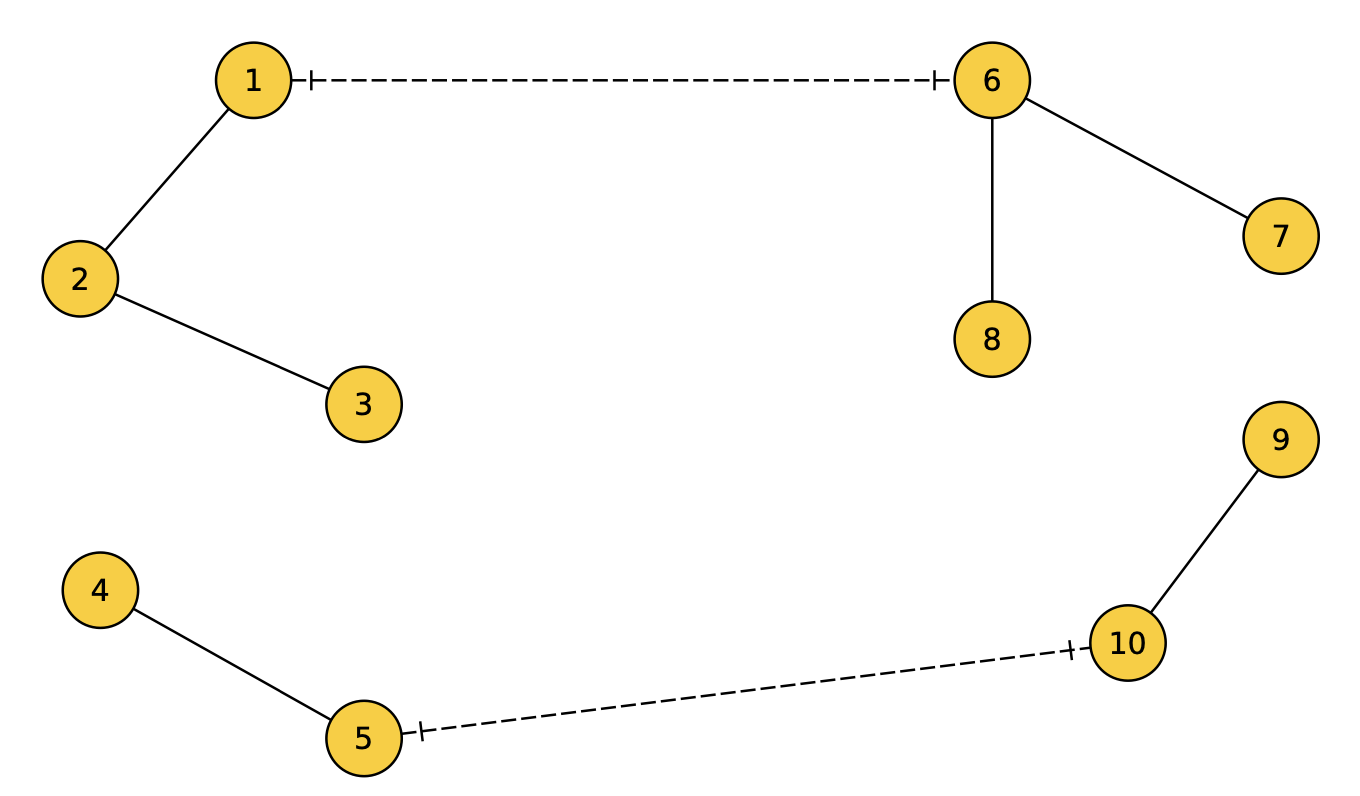
</div>

## Assignment 6.3

Explain how constraints can help clustering the following data. Also think about possible problems that may arise when adding contraints.

<div align="center">
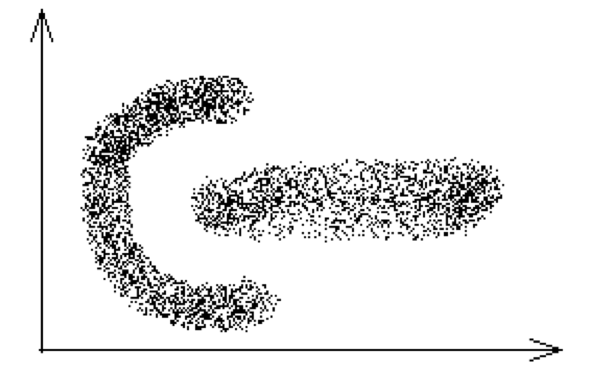
</div>

Below is a small toy example of using Gaussian Mixture Models, unrelated to the exercises. Practising an example broadly outlined by Ritvikmath

In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy as np

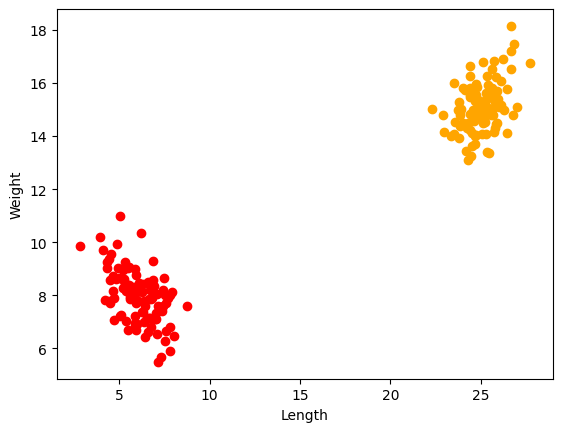

In [4]:
s_mu = [25, 15]
S_cov = [[1, 0.2],[0.2, 1]]

t_mu = [6, 8]
T_cov = [[1, -0.6],[-0.6, 1]]

x = np.linspace(0, 5, 40, endpoint=False)

salmon_data = scipy.stats.multivariate_normal.rvs(mean = s_mu, cov = S_cov, size = 100)
tuna_data = scipy.stats.multivariate_normal.rvs(mean = t_mu, cov = T_cov, size = 100)

plt.scatter(salmon_data[:, 0], salmon_data[:, 1], color="orange")
plt.scatter(tuna_data[:, 0], tuna_data[:, 1], color="red")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [6]:
from sklearn.mixture import GaussianMixture
clf = GaussianMixture(n_components=2, covariance_type="full")
X = np.vstack([salmon_data, tuna_data])
clf.fit(X)
clf.means_

array([[ 6.05928328,  7.96444294],
       [25.01687433, 15.09232269]])

In [9]:
clf.covariances_[0]

array([[ 1.21730173, -0.58196109],
       [-0.58196109,  1.00562842]])

In [12]:
x, y = np.mgrid[0:30:1, 5:20:1]
pos = np.dstack((x, y))
rv1 = scipy.stats.multivariate_normal(mean=clf.means_[0], cov=clf.covariances_[0])
rv2 = scipy.stats.multivariate_normal(mean=clf.means_[1], cov=clf.covariances_[1])

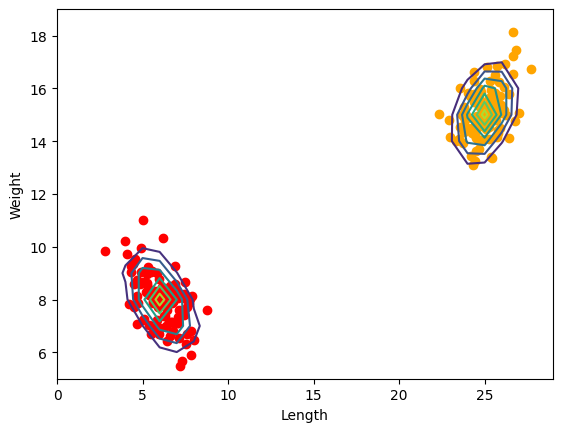

In [21]:
plt.scatter(salmon_data[:, 0], salmon_data[:, 1], color="orange")
plt.scatter(tuna_data[:, 0], tuna_data[:, 1], color="red")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.contour(x, y, rv1.pdf(pos))
plt.contour(x, y, rv2.pdf(pos))
plt.show()